In [11]:
%matplotlib_svg
import numpy as np
from matplotlib import pyplot as plt

# matplotlib-绘制精美的图表

## 快速绘图

In [3]:
%matplotlib inline

In [4]:
%config InlineBackend.close_figures = False

### 使用pyplot模块绘图

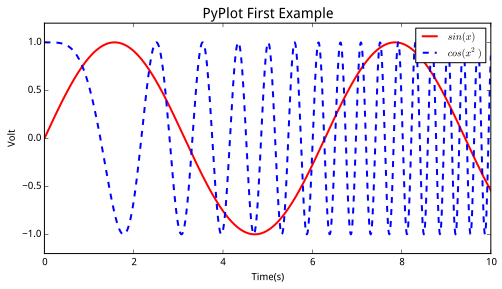

In [5]:
#%fig=使用pyplot模块快速将数据绘制成曲线图
import matplotlib.pyplot as plt #❶

x = np.linspace(0, 10, 1000)
y = np.sin(x)
z = np.cos(x**2)

plt.figure(figsize=(8,4)) #❷

plt.plot(x,y,label="$sin(x)$",color="red",linewidth=2) #❸
plt.plot(x,z,"b--",label="$cos(x^2)$") #❹

plt.xlabel("Time(s)") #❺
plt.ylabel("Volt") 
plt.title("PyPlot First Example") 
plt.ylim(-1.2,1.2) 
plt.legend() 

plt.show() #❻

> **WARNING**

> 使用LaTeX语法绘制数学公式会极大地降低图表的描绘速度。

In [6]:
plt.savefig("test.png", dpi=120)

> **TIP**

> 如果关闭了图表窗口，则无法使用`savefig()`保存图像。实际上不需要调用`show()`显示图表，可以直接用`savefig()`将图表保存成图像文件。使用这种方法可以很容易编写批量输出图表的程序。    

In [7]:
import io
buf = io.BytesIO() # 创建一个用来保存图像内容的BytesIO对象
plt.savefig(buf, fmt="png") # 将图像以png格式保存进buf中
buf.getvalue()[:20] # 显示图像内容的前20个字节

'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 '

### 面向对象方式绘图

In [10]:
fig = plt.gcf()
axes = plt.gca()
print((fig, axes))

Figure(640x320) Axes(0.125,0.1;0.775x0.8)


### 配置属性

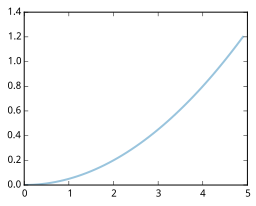

In [11]:
#%fig[1x3]=配置绘图对象的属性
plt.figure(figsize=(4, 3))
x = np.arange(0, 5, 0.1)
line = plt.plot(x, 0.05*x*x)[0] # plot返回一个列表
line.set_alpha(0.5) # 调用Line2D对象的set_*()方法设置属性值

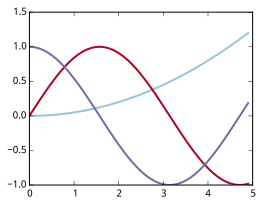

In [12]:
lines = plt.plot(x, np.sin(x), x, np.cos(x))

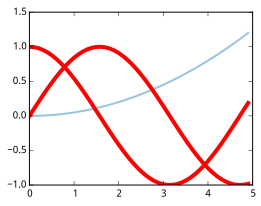

In [13]:
plt.setp(lines, color="r", linewidth=4.0);

In [14]:
print((line.get_linewidth()))
print((plt.getp(lines[0], "color"))) # 返回color属性

2.0
r


In [15]:
f = plt.gcf()
%omit plt.getp(f)

    agg_filter = None
    alpha = None
    animated = False
    axes = [<matplotlib.axes._subplots.AxesSubplot object at ...
    ...

In [16]:
print((plt.getp(f, "axes"), plt.getp(f, "axes")[0] is plt.gca()))

[<matplotlib.axes._subplots.AxesSubplot object at 0x05DE5790>] True


In [17]:
alllines = plt.getp(plt.gca(), "lines")
print((alllines, alllines[0] is line)) # 其中的第一条曲线就是最开始绘制的那条曲线

<a list of 3 Line2D objects> True


In [19]:
print((f.axes, len(f.axes[0].lines)))

[<matplotlib.axes._subplots.AxesSubplot object at 0x05DE5790>] 3


### 绘制多子图

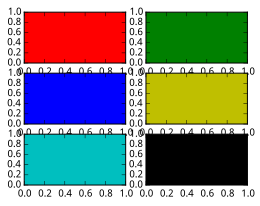

In [27]:
#%fig[1x2]=在Figure对象中创建多个子图
for idx, color in enumerate("rgbyck"):  
    plt.subplot(321+idx, axisbg=color)

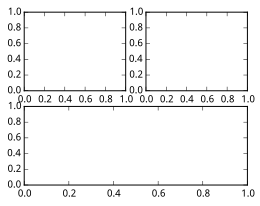

In [29]:
plt.subplot(221) # 第一行的左图
plt.subplot(222) # 第一行的右图
plt.subplot(212) # 第二整行;

In [22]:
#%hide
plt.close("all")

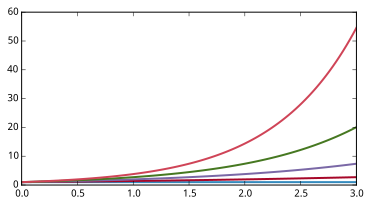

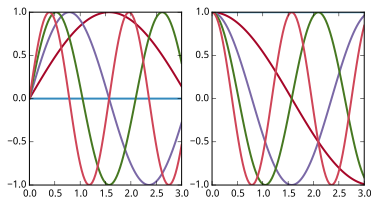

In [30]:
#%fig[1x2]=同时在多幅图表、多个子图中进行绘图
plt.figure(1) # 创建图表1
plt.figure(2) # 创建图表2
ax1 = plt.subplot(121) # 在图表2中创建子图1
ax2 = plt.subplot(122) # 在图表2中创建子图2

x = np.linspace(0, 3, 100)
for i in range(5):
    plt.figure(1)  #❶ 选择图表1
    plt.plot(x, np.exp(i*x/3))
    plt.sca(ax1)   #❷ 选择图表2的子图1
    plt.plot(x, np.sin(i*x))
    plt.sca(ax2)  # 选择图表2的子图2
    plt.plot(x, np.cos(i*x))

> **TIP**

> 也可以不调用`sca()`指定当前子图，而直接调用`ax1`和`ax2`的`plot()`方法绘图。

(2, 3)
Axes(0.398529,0.536364;0.227941x0.363636)


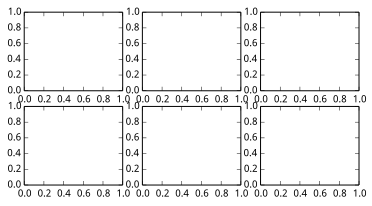

In [21]:
#%nofig
fig, axes = plt.subplots(2, 3)
[a, b, c], [d, e, f] = axes
print((axes.shape))
print(b)

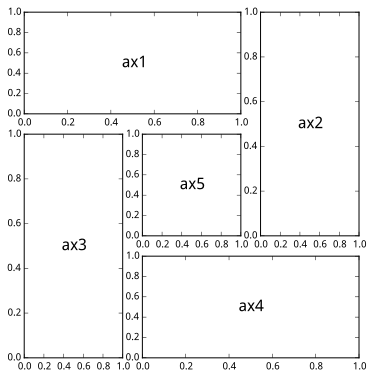

In [35]:
#%fig=使用subplot2grid()创建表格布局
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 1), colspan=2)
ax5 = plt.subplot2grid((3, 3), (1, 1));
#%hide
for idx, ax in enumerate(fig.axes, 1):
    ax.text(0.5, 0.5, "ax{}".format(idx), ha="center", va="center", fontsize=16)

### 配置文件

In [31]:
from os import path
path.abspath(matplotlib.get_configdir())

u'C:\\Users\\RY\\Dropbox\\scipybook2\\settings\\.matplotlib'

In [32]:
path.abspath(matplotlib.matplotlib_fname())

u'C:\\Users\\RY\\Dropbox\\scipybook2\\settings\\.matplotlib\\matplotlibrc'

In [33]:
%omit print(matplotlib.rc_params())

agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
...

In [35]:
%omit print(matplotlib.rcParams)

agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
...

In [39]:
#%hide
plt.close("all")

In [41]:
%%disabled
matplotlib.rcParams["lines.marker"] = "o"
plt.plot([1,2,3,2])

In [42]:
%%disabled
matplotlib.rc("lines", marker="x", linewidth=2, color="red")

In [81]:
%%disabled
matplotlib.rcdefaults()

In [29]:
%%disabled
matplotlib.rcParams.update( matplotlib.rc_params() )

> **TIP**

> 通过`pyplot`模块也可以使用`rcParams`、`rc`和`rcdefaults`。

In [5]:
from matplotlib import style
print((style.available))

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']


In [6]:
style.use("ggplot")

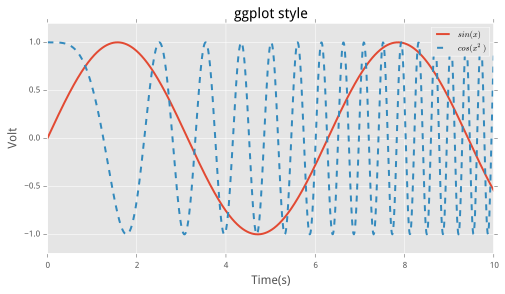

In [10]:
#%figonly=使用ggplot样式绘图
import numpy as np
import matplotlib.pyplot as plt

style.use("ggplot")

plt.close("all")

x = np.linspace(0, 10, 1000)
y = np.sin(x)
z = np.cos(x**2)

plt.figure(figsize=(8,4))

plt.plot(x,y,label="$sin(x)$",linewidth=2)
plt.plot(x,z,"--",label="$cos(x^2)$")

plt.xlabel("Time(s)")
plt.ylabel("Volt") 
plt.title("ggplot style") 
plt.ylim(-1.2,1.2) 
plt.legend();

### 在图表中显示中文

In [8]:
from matplotlib.font_manager import fontManager
fontManager.ttflist[:6]

[<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>,
 <Font 'cmb10' (cmb10.ttf) normal normal 400 normal>,
 <Font 'cmex10' (cmex10.ttf) normal normal 400 normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>,
 <Font 'Bitstream Vera Serif' (VeraSeBd.ttf) normal normal 700 normal>,
 <Font 'Bitstream Vera Sans' (VeraIt.ttf) oblique normal 400 normal>]

In [14]:
print((fontManager.ttflist[0].name))
print((fontManager.ttflist[0].fname))

cmss10
C:\WinPython-32bit-2.7.9.2\python-2.7.9\lib\site-packages\matplotlib\mpl-data\fonts\ttf\cmss10.ttf


In [15]:
#%hide
plt.close("all")

> **SOURCE**

> `scpy2/matplotlib/chinese_fonts.py`：显示系统中所有文件大于1M的TTF字体，请读者使用该程序查询计算机中可使用的中文字体名。

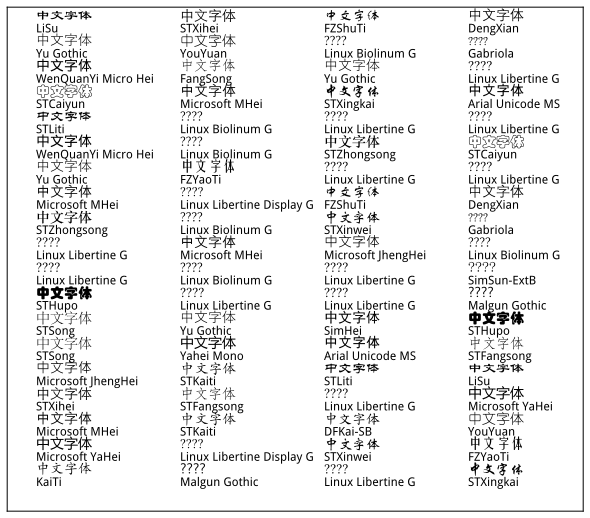

In [18]:
#%fig=显示系统中所有的中文字体名
import os
from os import path

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
plt.subplots_adjust(0, 0, 1, 1, 0, 0)
plt.xticks([])
plt.yticks([])
x, y = 0.05, 0.05
fonts = [font.name for font in fontManager.ttflist if 
             path.exists(font.fname) and os.stat(font.fname).st_size>1e6] #❶
font = set(fonts)
dy = (1.0 - y) / (len(fonts) // 4 + (len(fonts)%4 != 0))

for font in fonts:
    t = ax.text(x, y + dy / 2, "中文字体", 
                {'fontname':font, 'fontsize':14}, transform=ax.transAxes) #❷
    ax.text(x, y, font, {'fontsize':12}, transform=ax.transAxes)
    x += 0.25
    if x >= 1.0:
        y += dy
        x = 0.05
plt.show()

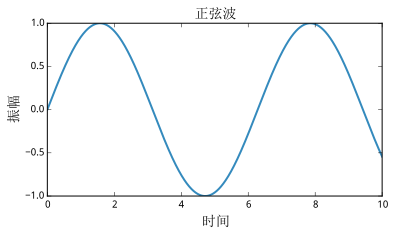

In [4]:
#%nofig
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14) #❶
t = np.linspace(0, 10, 1000)
y = np.sin(t)
plt.close("all")
plt.plot(t, y)
plt.xlabel("时间", fontproperties=font) #❷
plt.ylabel("振幅", fontproperties=font)
plt.title("正弦波", fontproperties=font)
plt.show()

In [7]:
from matplotlib.font_manager import _rebuild
_rebuild()

In [39]:
%%disabled
plt.rcParams["font.family"] = "SimHei"
plt.plot([1,2,3])
plt.xlabel(0.5 ,0.5, "中文字体")

In [21]:
#%hide
%exec_python -m scpy2.matplotlib.chinese_fonts